## **Configure Gradient Precision with Batch Size**


In [2]:
# Import the libraries
import tensorflow as tf
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

### **MLP fit with Batch gradient descent**
- In batch Gradient Descent all the examples from training dataset are used to estimate the error gradient.

Train: 0.812, Test: 0.854


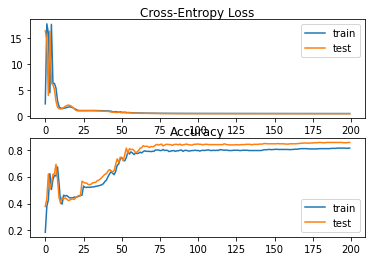

In [32]:
# generate 2d classification data
X, y= make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# one hot encoding output variable
y=to_categorical(y)
# split data into train and test
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.5)

# Defining the Sequential Model
model=Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

# Compile the model
opt=SGD(learning_rate=0.1, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
# fit the model
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, verbose=0,
                  batch_size=len(X_train))

# evaluate the model
_, train_acc=model.evaluate(X_train, y_train, verbose=0)
_, test_acc=model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot the loss learning curves
plt.subplot(211)
# plt.figure(figsize=(10,6))

plt.title('Cross-Entropy Loss', pad=-40)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

#plot accuracy learning curves
plt.subplot(212)
# plt.figure(figsize=(10,6))
# plt.figure(dpi=300)
plt.title('Accuracy', pad=-40)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

### **MLP Fit with Stochastic Gradient Descent**
- In stochastic gradient descent only 1 example from training dataset is used to estimate the error gradient.

Train: 0.558, Test: 0.567


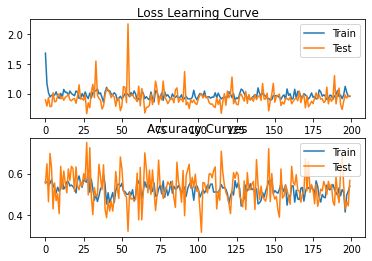

In [10]:
# Generating 2D Data
X, y= make_blobs(n_samples=2000, centers=3, n_features=2, cluster_std=2, random_state=2)
y=to_categorical(y)

# COnverting data into Train and test
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2)

# Definging the model
model=Sequential()
model.add(Dense(100, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

# compile the model
opt=SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the model
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, verbose=0,
                  batch_size=1)
# Evaluate the model
_, train_acc=model.evaluate(X_train, y_train, verbose=0)
_,test_acc=model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# Plotting the loss learning curves
plt.subplot(211)
plt.title('Loss Learning Curve', pad=-50)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.legend()

# Plotting the accuracy curves
plt.subplot(212)
plt.title('Accuracy Curves')
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.legend()
plt.show()


#### Training at low learning rate=0.001

Train: 0.818, Test: 0.810


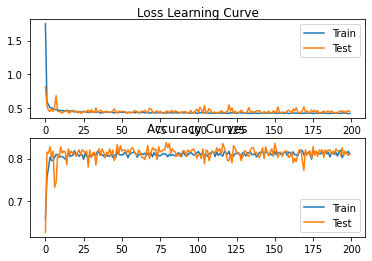

In [12]:
# Generating 2D Data
X, y= make_blobs(n_samples=2000, centers=3, n_features=2, cluster_std=2, random_state=2)
y=to_categorical(y)

# COnverting data into Train and test
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2)

# Definging the model
model=Sequential()
model.add(Dense(100, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

# compile the model
opt=SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the model
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, verbose=0,
                  batch_size=1)
# Evaluate the model
_, train_acc=model.evaluate(X_train, y_train, verbose=0)
_,test_acc=model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# Plotting the loss learning curves
plt.subplot(211)
plt.title('Loss Learning Curve', pad=-50)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.legend()

# Plotting the accuracy curves
plt.subplot(212)
plt.title('Accuracy Curves')
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.legend()
plt.show()


### **MLP fit with Minibatch Gradient Descent**
In Minibatch Gradient Descent examples from training dataset are between 1 and total size of training data used to estimate the error gradient. Normally 32 is used.

Train: 0.819, Test: 0.808


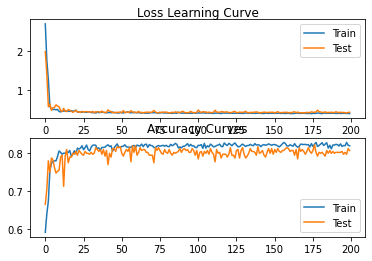

In [13]:
# Generating 2D Data
X, y= make_blobs(n_samples=2000, centers=3, n_features=2, cluster_std=2, random_state=2)
y=to_categorical(y)

# COnverting data into Train and test
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2)

# Definging the model
model=Sequential()
model.add(Dense(100, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

# compile the model
opt=SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the model
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, verbose=0,
                  batch_size=32)
# Evaluate the model
_, train_acc=model.evaluate(X_train, y_train, verbose=0)
_,test_acc=model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# Plotting the loss learning curves
plt.subplot(211)
plt.title('Loss Learning Curve', pad=-50)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.legend()

# Plotting the accuracy curves
plt.subplot(212)
plt.title('Accuracy Curves')
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.legend()
plt.show()
